In [1]:
# load some libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy.special import sph_harm
from scipy.special import erf
# import library for hf routines
import hf_routines as hf
# import library for setting up plots
import plotting as myplt

In [4]:
def CI(orbitalEnergies,twoE,atoms):
    # Populate 2x2 Hamiltonian matrix
    H_CI = np.empty((2,2),dtype=float)
    H_CI[0,0] = 2*orbitalEnergies[0] - twoE[0,0,0,0]  # 2e1 - J11
    H_CI[0,1] = H_CI[1,0] = twoE[0,1,1,0]  # K12
    H_CI[1,1] = 2*orbitalEnergies[1] - 4*twoE[0,0,1,1] + twoE[1,1,1,1] + 2*twoE[0,1,1,0] # 2e2 -4J12 + J22 +2K12
    # diagonalize
    energy, CIs = np.linalg.eig(H_CI)
    idx = energy.argsort()
    energy = energy[idx]
    CIs = CIs[:,idx]
    nAtoms = len(atoms)
    Enucl = 0.0
    for atom1 in range(nAtoms-1):
        for atom2 in range(atom1+1,nAtoms):
            diff = atoms[atom1].pos - atoms[atom2].pos
            dist = np.linalg.norm(diff)
            Enucl += atoms[atom1].charge*atoms[atom2].charge/dist
    return energy[0]+Enucl, CIs

In [5]:
# define the HeH+ molecular system - basis functions and atoms
# set STO-3G basis and atoms
zeta = [1.24,2.0925]
R = np.empty((2,3),dtype=float)
R[0,0] = R[0,1] = R[0,2] = 0.0
R[1,0] = 1.4
R[1,1] = R[1,2] = 0.0
Z = [1.0,2.0]
basis_set = [hf.sto(3,zeta[i],R[i,:]) for i in range(2)]
atoms = [hf.atom(R[i,:],Z[i]) for i in range(2)]

In [6]:
# perform HF and CI as a function of R on HeH+
# scan R - can use optimal C
r = np.arange(0.5,6.0,0.05)
ci_energy = np.empty(r.size)
hf_energy = np.empty(r.size)
ci_coeff = np.empty((r.size,2))
for i in range(r.size):
    basis_set[1].R[0] = r[i]
    atoms[1].pos[0] = r[i]
    hf_energy[i], C, orbitalEnergies, hf_twoE = hf.perform_hf(basis_set,atoms)
    ci_energy[i], CIs = CI(orbitalEnergies,hf_twoE,atoms)
    ci_coeff[i,:] = CIs[:,0]

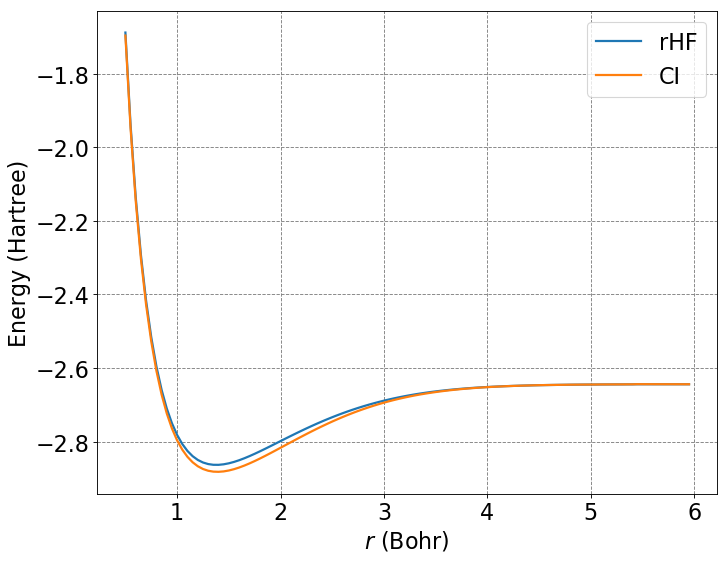

In [7]:
# plot results
ax = myplt.define_figure(xlabel="$r$ (Bohr)",ylabel="Energy (Hartree)")
ax.plot(r,hf_energy,lw=2,label='rHF')
ax.plot(r,ci_energy,lw=2,label='CI')
ax.legend(fontsize=20)

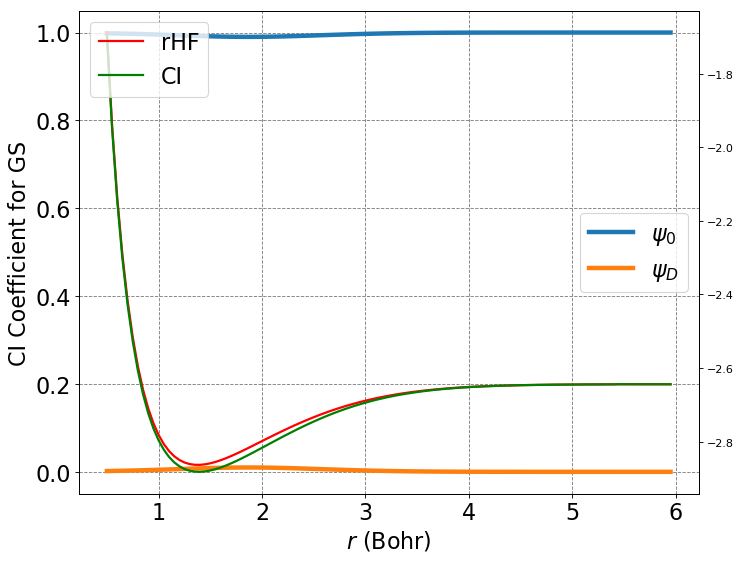

In [8]:
# plot results
ax = myplt.define_figure(xlabel="$r$ (Bohr)",ylabel="CI Coefficient for GS")
ax.plot(r,ci_coeff[:,0]**2,lw=4,label="$\psi_0$")
ax.plot(r,ci_coeff[:,1]**2,lw=4,label="$\psi_D$")
ax.legend(fontsize=20)
ax2 = ax.twinx()
ax2.plot(r,hf_energy,lw=2,label='rHF',c='r')
ax2.plot(r,ci_energy,lw=2,label='CI',c='g')
ax2.legend(fontsize=20,loc=2)

No handles with labels found to put in legend.


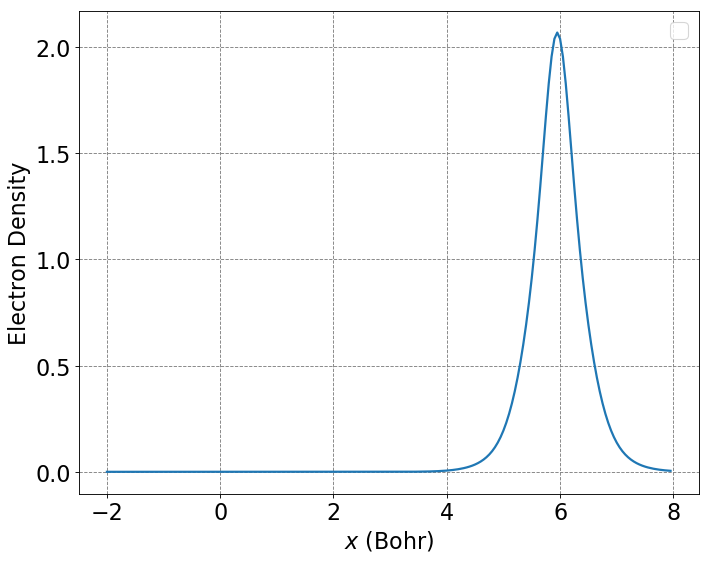

In [9]:
# plot electron density
x = np.arange(-2,8,0.05)
P = hf.constructDensityMat(C)
density1 = hf.compute_electron_density(basis_set,P,x)
#density2 = hf.compute_electron_density(basis_set,P_z_1_2,x)
ax = myplt.define_figure(xlabel="$x$ (Bohr)",ylabel="Electron Density")
ax.plot(x,density1,lw=2)
ax.legend(fontsize=20)